## Eigen Value Method

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


<img src="img/5s.png" height =400px, width = 400px> <img>

### Five State Markov Model

$$\large{\frac{dO(t)}{dt} = k_{io}I(t) + k_{co}C(t) - (k_{oi} + k_{oc})O(t)}$$ 

$$\large{\frac{dC(t)}{dt} = k_{oc}O(t) + k_{ic}I(t) + k_{pc}P(t) - (k_{co} + k_{ci} + k_{cp})C(t)}$$ 

$$\large{\frac{dI(t)}{dt} = k_{oi}O(t) + k_{ci}C(t) - (k_{io} + k_{ic})I(t)}$$

$$\large{\frac{dP(t)}{dt} = k_{cp}C(t) + k_{qp}Q(t) - (k_{pc} + k_{pq})P(t)}$$ 

$$\large{\frac{dQ(t)}{dt} = k_{pq}P(t) - k_{qp}Q(t)}$$

Using $$\large{Q = 1 - I - C - O - P}$$

for equilibrium

$$\large{k_{io}I(t) + k_{co}C(t) - (k_{oi} + k_{oc})O(t) = 0}$$ 

$$\large{k_{oc}O(t) + k_{ic}I(t) + k_{pc}P(t) - (k_{co} + k_{ci} + k_{cp})C(t) = 0}$$ 

$$\large{k_{oi}O(t) + k_{ci}C(t) - (k_{io} + k_{ic})I(t) = 0}$$

$$\large{ (k_{qp} - k_{cp})C(t) + (k_{pc} + k_{pq} + k_{qp})P(t) + k_{qp}I(t) + k_{qp}O(t) = k_{qp}}$$ 

#### Algeraic Solution

$$\begin{pmatrix}
-(k_{oi} + k_{oc}) & k_{co} & k_{io} & 0\\
k_{oc} & - (k_{co} + k_{ci} + k_{cp}) & k_{ic} & k_{pc}\\
k_{oi} & k_{ci} & - (k_{io} + k_{ic}) & 0\\
k_{qp} & (k_{qp} - k_{cp}) &  k_{qp} & (k_{pc} + k_{pq} + k_{qp})\\
\end{pmatrix} \begin{pmatrix}
O\\
C\\
I\\
P\\
\end{pmatrix} = \begin{pmatrix}
0\\
0\\
0\\
k_{qp}\\
\end{pmatrix}$$

In [3]:
k = {"koi":0.32,\
     "kio":0.24,\
     "kco": 0.31,\
     "koc": 0.12,\
     "kic":0.34,\
     "kci":0.23,\
     "kcp": 0.37,\
     "kpc":0.22,\
     "kpq":0.31,\
     "kqp":0.15}

In [4]:
A = np.array([[-(k['koi']+k['koc']), k['kco'], k['kio'],0],
              [k['koc'], -(k['kco']+k['kci']+k['kcp']), k['kic'],k['kpc']],
              [k['koi'], k['kci'], -(k['kio']+k['kic']),0],
              [k['kqp'], (k['kqp'] - k['kcp']), k['kqp'],(k['kpc']+k['kpq']+k['kqp'])]])

In [5]:
A

array([[-0.44,  0.31,  0.24,  0.  ],
       [ 0.12, -0.91,  0.34,  0.22],
       [ 0.32,  0.23, -0.58,  0.  ],
       [ 0.15, -0.22,  0.15,  0.68]])

In [6]:
b  = np.array([0,0,0,k['kqp']])

In [7]:
from numpy import linalg

In [8]:
x = np.linalg.solve(A, b)

In [9]:
x

array([0.1532031 , 0.11630397, 0.13064639, 0.19560213])

In [10]:
1-sum(x)

0.4042444074447815

#### Numerical Solution

$$\large{\frac{dO(t)}{dt} = k_{io}I(t) + k_{co}C(t) - (k_{oi} + k_{oc})O(t)}$$ 

$$\large{\frac{dC(t)}{dt} = k_{oc}O(t) + k_{ic}I(t) + k_{pc}P(t) - (k_{co} + k_{ci} + k_{cp})C(t)}$$ 

$$\large{\frac{dI(t)}{dt} = k_{oi}O(t) + k_{ci}C(t) - (k_{io} + k_{ic})I(t)}$$

$$\large{\frac{dP(t)}{dt} = k_{cp}C(t) + k_{qp}Q(t) - (k_{pc} + k_{pq})P(t)}$$ 

$$\large{Q = 1 - I - C - O - P}$$

In [11]:
# function that returns dy/dt
def model(y,t,k):
    
    '''y[0] = O,
       y[1] = C,
       y[2] = I,
       y[3] = P
    '''
    
    dy1dt = -(k['koi']+k['koc'])*y[0] +  k['kco']*y[1] +  k['kio']*y[2] 
    
    dy2dt = k['koc']*y[0] -(k['kco']+k['kci']+k['kcp'])*y[1] \
         +  k['kic']*y[2] + k['kpc']*y[3]
    
    dy3dt = k['koi']*y[0] + k['kci']*y[1] -(k['kio']+k['kic'])*y[2] 
    
    dy4dt = k['kqp'] - k['kqp']*y[0] - (k['kqp']-k['kcp'])*y[1] \
                     - k['kqp']*y[2] - (k['kqp']+k['kpc']+k['kpq'])*y[3]
    
    
    dydt = [dy1dt,dy2dt,dy3dt,dy4dt]
    return dydt

In [12]:
N = 1
T = 45

# initial condition
y0 = [0,0,0,1]

# time points
t = np.linspace(0,T)


'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))


y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
y4 = np.empty_like(t)
y5 = np.empty_like(t)
for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]
    y4[i] = y[i][3]
    y5[i] = 1 - y1[i] - y2[i] - y3[i] - y4[i]

In [13]:
y1[T],y2[T],y3[T],y4[T],y5[T]

(0.15207871024029435,
 0.11582562983472518,
 0.12966873235864482,
 0.19596397516696185,
 0.4064629523993738)

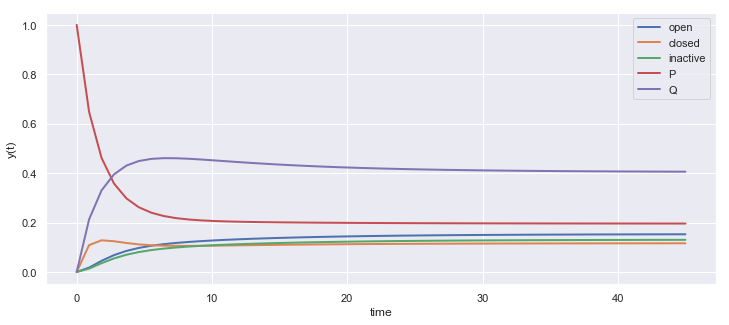

In [14]:
# plot results
plt.figure(figsize = [12,5])
plt.plot(t,y1,linewidth=2,label='open')
plt.plot(t,y2,linewidth=2,label='closed')
plt.plot(t,y3,linewidth=2,label='inactive')
plt.plot(t,y4,linewidth=2,label='P')
plt.plot(t,y5,linewidth=2,label='Q')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()